# Acne Detection using Custom CNN

## Training and Validation

### Importing Dependencies

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2024-08-03 22:16:17.631906: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:17.634924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:17.644775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 22:16:17.660469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 22:16:17.664835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 22:16:17.675310: I tensorflow/core/platform/cpu_feature_gu

### Define the custom CNN architecture

In [2]:
# model = Sequential()

In [3]:
# help(model)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer with 32 filters, a 3x3 kernel size, ReLU activation, 
    # and an input shape of (224, 224, 3) for RGB images.
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),

    # Max pooling layer with a 2x2 pool size to reduce the spatial dimensions.
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with 64 filters, a 3x3 kernel size, and ReLU activation.
    Conv2D(64, (3, 3), activation='relu'),

    # Max pooling layer with a 2x2 pool size to further reduce the spatial dimensions.
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with 128 filters, a 3x3 kernel size, and ReLU activation.
    Conv2D(128, (3, 3), activation='relu'),

    # Max pooling layer with a 2x2 pool size to further reduce the spatial dimensions.
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to convert the 2D output of the previous layer to a 1D vector.
    Flatten(),

    # Fully connected layer with 256 units and ReLU activation.
    Dense(256, activation='relu'),

    # Dropout layer with a dropout rate of 0.5 to prevent overfitting.
    Dropout(0.5),

    # Output layer with a single unit and sigmoid activation for binary classification.
    Dense(1, activation='sigmoid')
])

/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Data augmentation and generators for training and validation

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    "dataset/training/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1646 images belonging to 2 classes.


In [9]:
val_generator = val_datagen.flow_from_directory(
    "dataset/validation/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 112 images belonging to 2 classes.


In [10]:
# help(model)

### Train the model

In [11]:
model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.5839 - loss: 0.6861 - val_accuracy: 0.8125 - val_loss: 0.3614
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 295s 5s/step - accuracy: 0.8699 - loss: 0.3368 - val_accuracy: 0.8929 - val_loss: 0.2321
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.8765 - loss: 0.3135 - val_accuracy: 0.7054 - val_loss: 0.7589
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.8513 - loss: 0.3398 - val_accuracy: 0.8125 - val_loss: 0.5923
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 274s 5s/step - accuracy: 0.8908 - loss: 0.2777 - val_accuracy: 0.9107 - val_loss: 0.2392
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 313s 5s/step - accuracy: 0.9167 - loss: 0.2391 - val_accuracy: 0.8482 - val_loss: 0.3655
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 290s 5s/step - accuracy: 0.9196 - loss: 0.2153 - val_accuracy: 0.8214 - val_loss: 0.5070
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 300s 6s/step - accuracy: 0.9211 - loss: 0.2174 - val_accuracy: 0.8214 - val_loss: 0.

2024-08-03 23:42:28.121143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-08-03 23:42:29.466823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


52/52 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - accuracy: 0.9341 - loss: 0.1890 - val_accuracy: 0.7857 - val_loss: 0.8481
Epoch 19/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.9439 - loss: 0.1571 - val_accuracy: 0.8304 - val_loss: 0.4969
Epoch 20/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.9572 - loss: 0.1381 - val_accuracy: 0.8214 - val_loss: 0.5142
Epoch 21/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 295s 5s/step - accuracy: 0.9470 - loss: 0.1530 - val_accuracy: 0.8125 - val_loss: 0.7670
Epoch 22/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9497 - loss: 0.1362 - val_accuracy: 0.8214 - val_loss: 0.4983
Epoch 23/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.9398 - loss: 0.1639 - val_accuracy: 0.8304 - val_loss: 0.5108
Epoch 24/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.9536 - loss: 0.1243 - val_accuracy: 0.8304 - val_loss: 0.4951
Epoch 25/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.9695 - loss: 0.1074 - val_accuracy: 0.8304 - val_l

### Model Evaluation

In [12]:
test_generator = val_datagen.flow_from_directory(
    "dataset/testing/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 96 images belonging to 2 classes.


In [20]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.6354 - loss: 0.9921
Test Accuracy: 0.77
Test Loss: 0.62


### Confusion Matrix

In [21]:
# Import functions for evaluating classification performance from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels from the test generator
# This will be an array of true class labels for the test dataset
true_labels = test_generator.classes

# Generate predictions for the test dataset using the trained model
# This method returns the predicted probabilities for each class
predictions = model.predict(test_generator)

# Convert the predicted probabilities to binary labels
# Using a threshold of 0.5 for binary classification
# Reshape the array to ensure it matches the shape of true_labels
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

# Compute the confusion matrix to evaluate the performance of the model
# The confusion matrix provides insights into true positives, false positives, true negatives, and false negatives
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Generate a classification report that includes precision, recall, and F1-score
# This report provides a detailed evaluation of the model's performance for each class
print(classification_report(true_labels, predicted_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
[[26 22]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        48
           1       0.69      1.00      0.81        48

    accuracy                           0.77        96
   macro avg       0.84      0.77      0.76        96
weighted avg       0.84      0.77      0.76        96



### Heatmap of Confusion Matrix

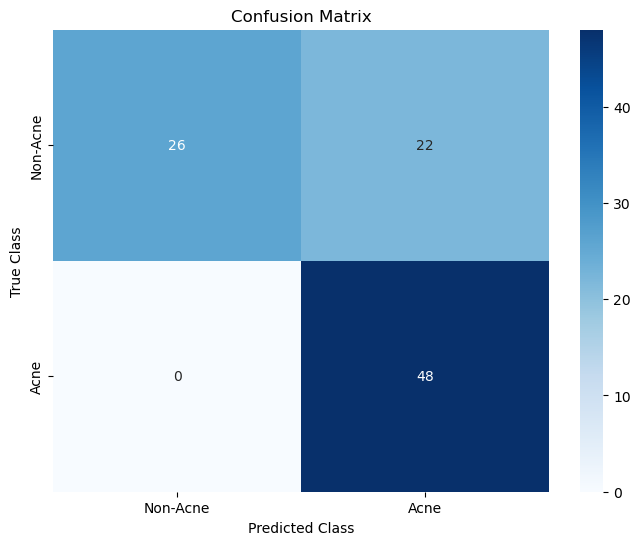

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume true_labels and predicted_labels are already defined as in the previous example

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = ['Non-Acne', 'Acne']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### ROC Curve and AUC (Area Under the Curve)

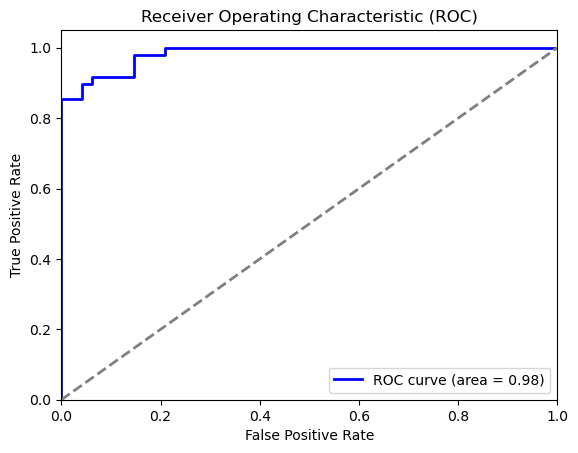

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Precision vs Recall vs F1-Score

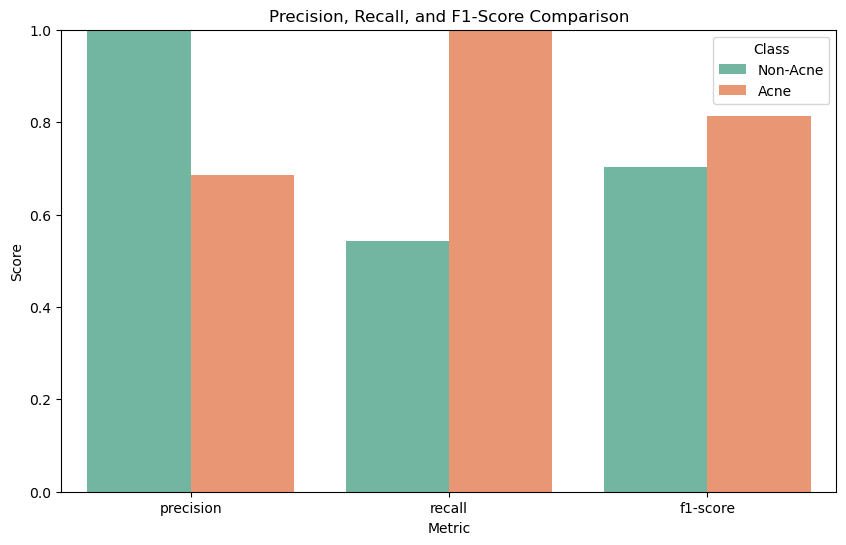

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming true_labels and predicted_labels are defined
# true_labels: Actual labels
# predicted_labels: Predicted labels by the model

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=['Non-Acne', 'Acne'], output_dict=True)

# Extract Precision, Recall, and F1-Score for each class
metrics = ['precision', 'recall', 'f1-score']
classes = ['Non-Acne', 'Acne']
values = {metric: [report[class_name][metric] for class_name in classes] for metric in metrics}

# Convert to a format suitable for seaborn
metrics_data = []
for metric, scores in values.items():
    for score, class_name in zip(scores, classes):
        metrics_data.append({'Metric': metric, 'Class': class_name, 'Score': score})

# Create a DataFrame
import pandas as pd
df_metrics = pd.DataFrame(metrics_data)

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df_metrics, palette='Set2')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.ylabel('Score')
plt.show()


### Matthews Correlation Coefficient (MCC)

These metrics provide a more comprehensive evaluation of your model's performance, helping to understand its strengths and weaknesses, especially in the context of medical diagnostics where accurate classification is critical.

In [25]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predicted_labels)
print(f'MCC: {mcc:.2f}')


MCC: 0.61


### Making predictions using a single image

In [18]:
# Import necessary libraries
import numpy as np  # For numerical operations
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Load and preprocess the image
img_path = "dataset/single_prediction/skin_2.jpeg"  # Path to the image file
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it to 224x224 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing (scaling pixel values)

# Make a prediction using the trained model
prediction = model.predict(img_array)  # Get the predicted probability from the model
prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

# Map prediction to class label
class_labels = ['Non-Acne', 'Acne']  # Define the class labels
predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

# Print the predicted class label
print(f'Predicted Label: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: Acne


### Saving the Modelm

In [27]:
from tensorflow.keras.models import save_model

# Assuming `model` is your trained Keras model
model.save('CustomModel.h5')  # Save model to HDF5 file


### Testing all the acne files

In [76]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Define the directory path
acne_path = "../dataset/testing/acne/"

# Get a list of all files and directories in the specified directory
all_acne_files = os.listdir(acne_path)

# Filter out only files
acne_files = [f for f in all_acne_files if os.path.isfile(os.path.join(acne_path, f))]


# Iterate over each file in the acne directory
for file_name in acne_files:
    # Load and preprocess the image
    img_path = os.path.join(acne_path, file_name)  # Construct the full path to the image
    img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing

    # Make a prediction using the trained model
    prediction = model.predict(img_array)  # Get the predicted probability from the model
    prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

    # Map prediction to class label
    class_labels = ['Non-Acne', 'Acne']  # Define the class labels
    predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

    # Print the predicted class label
    print(f'Predicted Label for {file_name}: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for acne-286_jpeg.rf.1b6bcca440593ac6e33617083f34a4c5.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for acne-422_jpeg.rf.c90a75e149931778d9c643273737df59.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for acne-276_jpeg.rf.9d0990f99dee0e0ec17d89fd07384e0b.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for acne-140_jpg.rf.785b2c29676c422c6a1cdbe6708f86e8.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for acne-84_jpeg.rf.040421ad53965f5f41ddc6f6a8edef9f.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for acne-60_jpeg.rf.f2694c8e6226c725ff40b771560b5e06.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for acne-25_jpeg.rf.61edfe1eaf01bce48403a1a22f693a86.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for acne-32_jpeg.rf.6cfebd1da197182fd10391fc051d7308.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Define the directory path
acne_path = "../dataset/testing/acne/"

# Get a list of all files and directories in the specified directory
all_acne_files = os.listdir(acne_path)

# Filter out only files
acne_files = [f for f in all_acne_files if os.path.isfile(os.path.join(acne_path, f))]


# Iterate over each file in the acne directory
for file_name in acne_files:
    # Load and preprocess the image
    img_path = os.path.join(acne_path, file_name)  # Construct the full path to the image
    img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing

    # Make a prediction using the trained model
    prediction = model.predict(img_array)  # Get the predicted probability from the model
    prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

    # Map prediction to class label
    class_labels = ['Non-Acne', 'Acne']  # Define the class labels
    predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

    # Print the predicted class label
    print(f'Predicted Label for {file_name}: {predicted_label}')  # Output the predicted label


### Testing all the Non-acne files

In [80]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Define the directory path
acne_path = "../dataset/testing/skin/"

# Get a list of all files and directories in the specified directory
non_acne_files = os.listdir(acne_path)

# Filter out only files
non_acne_files = [f for f in non_acne_files if os.path.isfile(os.path.join(acne_path, f))]


# Iterate over each file in the acne directory
for file_name in non_acne_files:
    # Load and preprocess the image
    img_path = os.path.join(acne_path, file_name)  # Construct the full path to the image
    img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing

    # Make a prediction using the trained model
    prediction = model.predict(img_array)  # Get the predicted probability from the model
    prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

    # Map prediction to class label
    class_labels = ['Non-Acne', 'Acne']  # Define the class labels
    predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

    # Print the predicted class label
    print(f'Predicted Label for {file_name}: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for actinic-keratosis-5FU-5.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for eczema-hand-188.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for basal-cell-carcinoma-lesion-109.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for stasis-dermatitis-169.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for actinic-keratosis-5FU-25.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for basal-cell-carcinoma-lesion-94.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label for actinic-cheilitis-sq-cell-lip-54.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label for eczema-hand-133.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Label for eczema-hyperkeratotic-2.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label for eczema-hand-14.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label for basal-cell-carcinoma-les